**Problem**

---



Write a program to read DNA sequences file (prj9.fasta) and store the
information in a format for calculation for sequence features.

 Calculate following:

• Compute Shannon entropy for each DNA sequence.

• Compute dinucleotide relative frequency from DNA sequences and
expected dinucleotide relative frequency assuming P(x) = 0.25, where
x={A,T,G,C}. Note: the number of dinucleotide is length(DNA)-1

• Plot ratio of observed/expected relative frequency for all possible
dinucleotide.

**Theory**


---



Shannon entropy is calculated using a formula that considers the probability of each nucleotide appearing in the sequence.
 The more uncertain the outcome (even probabilities), the higher the entropy.

 Shannon entropy helps quantify the information content of each DNA sequence, reflecting its level of randomness or predictability.


A sequence with high entropy has a more even distribution of nucleotides (A, T, G, C). It's less predictable which nucleotide will come next, so we need more information (bits) to encode it
 A sequence with low entropy has a biased distribution of nucleotides.


The formula for Shannon entropy, denoted by H, is:

**H = - Σ (pi * log2(pi))**





where:

Σ (sigma) represents the summation over all possible outcomes (nucleotides in this case).

pi represents the probability of occurrence for each individual outcome (probability of each nucleotide A, T, G, C).

log2(pi) is the logarithm of the probability with base 2.
Here's a breakdown of the formula:

Probability (pi): We calculate the probability of each nucleotide appearing in the sequence. This can be done by dividing the count of each nucleotide by the total length of the sequence.

Logarithm (log2(pi)): This term captures the information content associated with each outcome. Higher probabilities (closer to 1) have a lower information content (logarithm approaches 0), while lower probabilities (closer to 0) have a higher information content (logarithm becomes more negative).

Summation (Σ): We sum the product of probability and its logarithm for all nucleotides in the sequence.
Negative Sign (-): The negative sign ensures that the entropy is always non-negative.

**Algorithm**


---



1. Define a function to read the given fastafile
2. Define Shannon entropy
3. define a function to compute dinucleotide relative frequency and expected dinucleotide relative frequency
4. Define a function to plot ratio of observed/expected relative frequency
5. Call the main function
6. Crosscheck and verify it using various tool and module.

In [70]:
#packages
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from math import log2

In [71]:
# function- to read the file
def read_file(file_name):
    sequences = {}
    with open(file_name, 'r') as file:
        seq_id = None
        sequence = ''
        for line in file:
            line = line.strip()
            if line.startswith('>'):
                if seq_id:
                    sequences[seq_id] = sequence
                seq_id = line[1:]
                sequence = ''
            else:
                sequence += line
        if seq_id:
            sequences[seq_id] = sequence
    return sequences

In [72]:
#Function- to define shannon entropy
def shannon_entropy(sequence):
    length = len(sequence)
    counts = Counter(sequence)
    sh_entropy = 0
    for count in counts.values():
        p = count / length
        sh_entropy -= p * log2(p)
    return sh_entropy

In [73]:
#Function- to compute dinucleotide relative frequency
def dinucleotide_freq(sequence):
    dinucleotides = ['AA', 'AT', 'AG', 'AC',
                     'TA', 'TT', 'TG', 'TC',
                     'GA', 'GT', 'GG', 'GC',
                     'CA', 'CT', 'CG', 'CC']
    counts = {d: sequence.count(d) for d in dinucleotides}
    total = sum(counts.values())
    freq = {d: counts[d]/(len(sequence)-1) for d in dinucleotides}
    return freq

# Function- to compute expected dinucleotide relative frequency
def exp_dinucleotide_freq():
    bases = ['A', 'T', 'G', 'C']
    dinucleotides = [b1 + b2 for b1 in bases for b2 in bases]
    return {d: 0.25*0.25 for d in dinucleotides}

In [74]:
# Function- to plot ratio of observed/expected relative frequency
def ratio_plot(obs, exp): #observed and expected
    dinucleotides = sorted(list(set(obs.keys()).union(set(exp.keys()))))
    observed_values = [obs.get(d, 0) for d in dinucleotides]
    expected_values = [exp.get(d, 0) for d in dinucleotides]

    plt.figure(figsize=(10, 6))
    plt.bar(dinucleotides, [o/e for o, e in zip(observed_values, expected_values)])
    plt.title('Ratio of observed/expected relative frequency')
    plt.xlabel('Dinucleotide')
    plt.ylabel('Ratio')
    plt.xticks(rotation=45)
    plt.show()

Sequence ID: NC_000011.10:c535576-532242 Homo sapiens chromosome 11, GRCh38.p14 Primary Assembly
Sequence: AGGCCCGCCCGAGTCTCCGCCGCCCGTGCCCTGCGCCCGCAACCCGAGCCGCACCCGCCGCGGACGGAGCCCATGCGCGGGGCGAACCGCGCGCCCCCGCCCCCGCCCCGCCCCGGCCTCGGCCCCGGCCCTGGCCCCGGGGGCAGTCGCGCCTGTGAACGGTGAGTGCGGGCAGGGATCGGCCGGGCCGCGCGCCCTCCTCGCCCCCAGGCGGCAGCAATACGCGCGGCGCGGGCCGGGGGCGCGGGGCCGGCGGGCGTAAGCGGCGGCGGCGGCGGCGGCGGCGGGTGGGTGGGGCCGGGCGGGGCCCGCGGGCACAGGTGAGCGGGCGTCGGGGGCTGCGGCGGGCGGGGGCCCCTTCCTCCCTGGGGCCTGCGGGAATCCGGGCCCCACCCGTGGCCTCGCGCTGGGCACGGTCCCCACGCCGGCGTACCCGGGAGCCTCGGGCCCGGCGCCCTCACACCCGGGGGCGTCTGGGAGGAGGCGGCCGCGGCCACGGCACGCCCGGGCACCCCCGATTCAGCATCACAGGTCGCGGACCAGGCCGGGGGCCTCAGCCCCAGTGCCTTTTCCCTCTCCGGGTCTCCCGCGCCGCTTCTCGGCCCCTTCCTGTCGCTCAGTCCCTGCTTCCCAGGAGCTCCTCTGTCTTCTCCAGCTTTCTGTGGCTGAAAGATGCCCCCGGTTCCCCGCCGGGGGTGCGGGGCGCTGCCCGGGTCTGCCCTCCCCTCGGCGGCGCCTAGTACGCAGTAGGCGCTCAGCAAATACTTGTCGGAGGCACCAGCGCCGCGGGGCCTGCAGGCTGGCACTAGCCTGCCCGGGCACGCCGTGGCGCGCTCCGCCGTGGCCAGACCTGTTCTGGAGGACGGTAACCTCAGCCCTCGGGCGCCTCCCTT

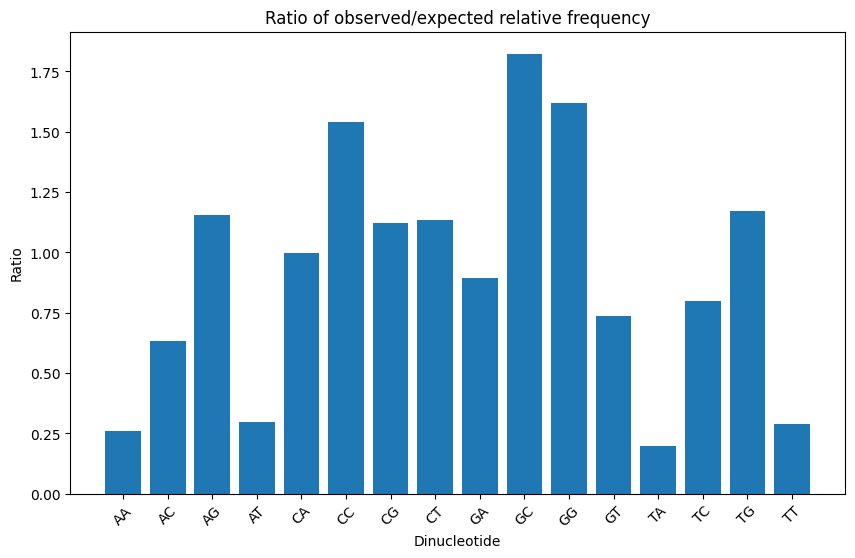

--------------------------------------------------
Sequence ID: NC_000003.12:c49411976-49359145 Homo sapiens chromosome 3, GRCh38.p14 Primary Assembly
Sequence: GCTCTCTCGCGCTACCCTCCCGCCGCCCGCGGTCCTCCGTCGGTTCTCTCGTTAGTCCACGGTCTGGTCTTCAGCTACCCGCCTTCGTCTCCGAGTTTGCGACTCGCGGACCGGCGTCCCCGGCGCGAAGAGGCTGGACTCGGATTCGTTGCCTGAGGTGAGCGGAAGGGTTCCCTCCAGGCGCCGCGGGGCCCCAGGCCCGCCAGCCCGGTACTCTTCCGGCCGGCAGGCCGCCGCACCGCCGCGGCCGCGCCCCACCGGCTGCTCGTGGCCGAGCCGCCCCTGGCCCCTGACCCTTGACCTGACTCCCAGCCCGGGCCCCGCGCCCCAAGCGGCGACCCCGCCCGCGCAGTCCCCGGAAGCGCGCCCGGTAGTCTCCTGTGCCCCTTCCCCCGCCCGGCCGGGCCTGGTGGAGCCCAGGCTGCCCGCCTGCCCGCCCTCGGTCCCCGGAGCTTCCTCTCCCAGCGGCGCCGGGCAGGGCGGGGGCTTTGGGCCGGGCCCCGCGACCGCGCAGTGTAGCCGGCCGCTGAAAGCGCGCGTGGCTGTCGGAGTTGAAATGGGAAAGAAACTCTTTACAACTCCATTTTGCTTTTTACGTTTAACGAGAAACGACAATCACTGTTTCATATTGATTAAAGTCCAGTTACACTTTGGGTAGGTTTTCTTTTAATGCAGACTTGTTGGAGACTGTGTAAGTAAGTAAAAGATTGTATTGAACGCTTAGGGGTATGATCTACGGCCATACCACCTGGAACGCGCCCGAACTCGTCTGAAAGCTTTGGGGTCTGTTTTGAGTGGAAAAGGGGTATTTTCCATTTGGAAAAAAAAAACAACACACA

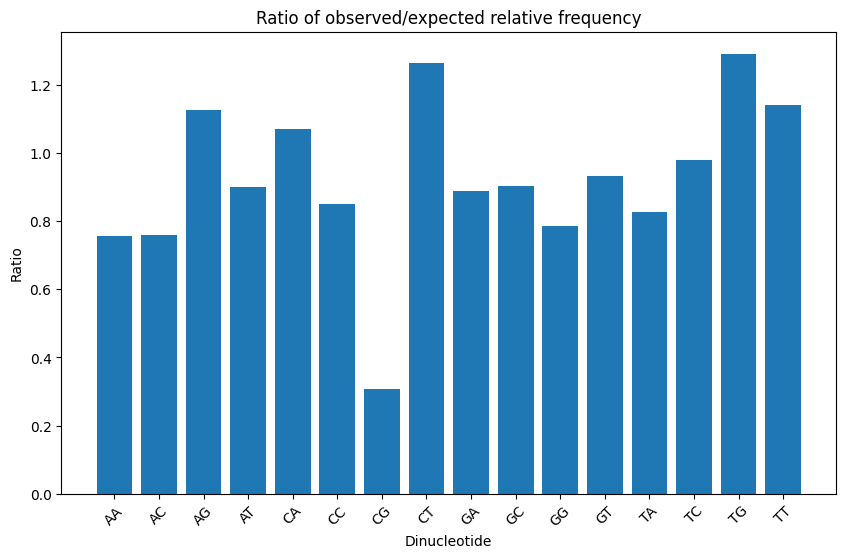

--------------------------------------------------


In [75]:
# Calling the main function, to execute
if __name__ == '__main__':
    file_name = '/content/prj12.fasta'
    sequences = read_file(file_name)

    for seq_id, sequence in sequences.items():
        print(f'Sequence ID: {seq_id}')
        print(f'Sequence: {sequence}')

        sh_entropy = shannon_entropy(sequence)
        print(f'Shannon entropy: {sh_entropy}')

        obs = dinucleotide_freq(sequence)
        exp = exp_dinucleotide_freq()

        print('Dinucleotide observed frequency:')
        for d, freq in obs.items():
            print(f'{d}: {freq:.4f}')

        print('Dinucleotide expected frequency:')
        for d, freq in exp.items():
            print(f'{d}: {freq:.4f}')

        ratio_plot(obs, exp)
        print('-' * 50)

# Verification steps

**Entropy from SciPy**

'entropy' function from SciPy to calculate Shannon entropy

In [76]:
from scipy.stats import entropy

# dictionary 'sequences' is defined previously

for seq_id, sequence in sequences.items():
    counts = Counter(sequence)
    length = len(sequence)
    probabilities = [count / length for count in counts.values()]

    entropy_value = entropy(probabilities, base=2)
    print(f'Sequence ID: {seq_id}')
    print(f'Shannon entropy: {entropy_value:.2f}')
    print('-' * 50)



Sequence ID: NC_000011.10:c535576-532242 Homo sapiens chromosome 11, GRCh38.p14 Primary Assembly
Shannon entropy: 1.89
--------------------------------------------------
Sequence ID: NC_000003.12:c49411976-49359145 Homo sapiens chromosome 3, GRCh38.p14 Primary Assembly
Shannon entropy: 1.99
--------------------------------------------------


**Using seqshannon tool**

In [77]:
!pip install seqshannon


In [78]:
!seqshannon -i /content/prj12.fasta

NC_000011.10:c535576-532242 1.888299576314521
NC_000003.12:c49411976-49359145 1.9914474678304266


**Dinucleotide Frequency Check:**

To verify if the sum of observed dinucleotide frequencies is approximately 1.
This will ensures that all dinucleotides are accounted for in the sequence.

In [79]:
for seq_id, sequence in sequences.items():
    observed = dinucleotide_freq(sequence)
    total_observed_freq = sum(observed.values())

    print(f'Dinucleotide Frequency Check for {seq_id}:')
    print(f'Total observed frequency: {total_observed_freq:.2f}')


Dinucleotide Frequency Check for NC_000011.10:c535576-532242 Homo sapiens chromosome 11, GRCh38.p14 Primary Assembly:
Total observed frequency: 0.92
Dinucleotide Frequency Check for NC_000003.12:c49411976-49359145 Homo sapiens chromosome 3, GRCh38.p14 Primary Assembly:
Total observed frequency: 0.92


Here we are getting value closer to value 1 not exactly one because, we are considering **all possible** dinucleotide.

**Expected Dinucleotide Frequency Check:**

To verify if the sum of observed dinucleotide frequencies is approximately 1.
This will ensures that all dinucleotides are accounted for in the sequence.

In [80]:
for seq_id, sequence in sequences.items():
    observed = exp_dinucleotide_freq()
    total_observed_freq = sum(observed.values())

    print(f'Expected Dinucleotide Frequency Check for {seq_id}:')
    print(f'Total Expected frequency: {total_observed_freq:.2f}')

Expected Dinucleotide Frequency Check for NC_000011.10:c535576-532242 Homo sapiens chromosome 11, GRCh38.p14 Primary Assembly:
Total Expected frequency: 1.00
Expected Dinucleotide Frequency Check for NC_000003.12:c49411976-49359145 Homo sapiens chromosome 3, GRCh38.p14 Primary Assembly:
Total Expected frequency: 1.00


#RESULT

Shannon entropy was calculated for each DNA sequence by defining a function called 'shannon_entropy'.

1.  **Shannon entropy ≈ 1.89** for Sequence ID: NC_000011.10:c535576-532242 Homo sapiens chromosome 11, GRCh38.p14 Primary Assembly
2. **Shannon entropy ≈ 1.99** for Sequence ID: NC_000003.12:c49411976-49359145 Homo sapiens chromosome 3, GRCh38.p14 Primary Assembly

This were further cross verified using 'entropy' function from SciPy and by using seqshannon tool.

Later a Plot for  observed/expected relative frequency ratio for all possible
dinucleotide were plotted.This plot illustrates how observed dinucleotide frequencies compare to the expected frequencies, may provide insights into potential biases or patterns in the DNA sequences.

